# nurseCharting

The nurseCharting table is the largest table in eICU-CRD, and contains information entered in a semi-structured form by care staff. The three columns `nursingchartcelltypecat`, `nursingchartcelltypevallabel` and `nursingchartcelltypevalname` provide an organised structure for the data, but values entered in `nursingchartvalue` are free text entry and therefore fairly unstructured. Nurse charting data can be entered directy into the system or can represent interfaced data from charting in the bedside EMR.

At the moment, publicly available data for this table has been chosen based upon whether the information in `nursingchartvalue` is structured: data where this is highly structured has been made available (including scores such as the Glasgow Coma Scale or vital signs such as heart rate), conversely data where this is highly unstructured (free-text comments, nursing assessments) are not currently publicly available.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import getpass

# for configuring connection 
from configobj import ConfigObj
import os

%matplotlib inline

/home/alistairewj/.local/lib/python3.5/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
# Create a database connection using settings from config file
config='../db/config.ini'

# connection info
conn_info = dict()
if os.path.isfile(config):
    config = ConfigObj(config)
    conn_info["sqluser"] = config['username']
    conn_info["sqlpass"] = config['password']
    conn_info["sqlhost"] = config['host']
    conn_info["sqlport"] = config['port']
    conn_info["dbname"] = config['dbname']
    conn_info["schema_name"] = config['schema_name']
else:
    conn_info["sqluser"] = 'postgres'
    conn_info["sqlpass"] = ''
    conn_info["sqlhost"] = 'localhost'
    conn_info["sqlport"] = 5432
    conn_info["dbname"] = 'eicu'
    conn_info["schema_name"] = 'public,eicu_crd'
    
# Connect to the eICU database
print('Database: {}'.format(conn_info['dbname']))
print('Username: {}'.format(conn_info["sqluser"]))
if conn_info["sqlpass"] == '':
    # try connecting without password, i.e. peer or OS authentication
    try:
        if (conn_info["sqlhost"] == 'localhost') & (conn_info["sqlport"]=='5432'):
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   user=conn_info["sqluser"])            
        else:
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   host=conn_info["sqlhost"],
                                   port=conn_info["sqlport"],
                                   user=conn_info["sqluser"])
    except:
        conn_info["sqlpass"] = getpass.getpass('Password: ')

        con = psycopg2.connect(dbname=conn_info["dbname"],
                               host=conn_info["sqlhost"],
                               port=conn_info["sqlport"],
                               user=conn_info["sqluser"],
                               password=conn_info["sqlpass"])
query_schema = 'set search_path to ' + conn_info['schema_name'] + ';'

Database: eicu
Username: alistairewj


## Examine a single patient

In [11]:
patientunitstayid = 141168

In [13]:
query = query_schema + """
select *
from nursecharting
where patientunitstayid = {}
order by nursingchartoffset
""".format(patientunitstayid)

df = pd.read_sql_query(query, con)
df.head()

,patientunitstayid,nursingchartid,nursingchartyear,nursingcharttime24,nursingcharttime,nursingchartoffset,nursingchartentryyear,nursingchartentrytime24,nursingchartentrytime,nursingchartentryoffset,nursingchartcelltypecat,nursingchartcelltypevallabel,nursingchartcelltypevalname,nursingchartvalue
0,141168,280649886,2015,06:00:00,midday,-594,2015,06:00:00,midday,-594,Other Vital Signs and Infusions,Abnormality Type-Skin Abnormality Arm Left Abr...,Value,Abrasion/Scratches
1,141168,217584767,2015,16:00:00,evening,6,2015,16:00:00,evening,6,Vital Signs,Non-Invasive BP,Non-Invasive BP Systolic,82
2,141168,243815878,2015,16:00:00,evening,6,2015,16:00:00,evening,6,Other Vital Signs and Infusions,Heart Rate Source,Value,Monitor
3,141168,201844758,2015,16:00:00,evening,6,2015,16:00:00,evening,6,Other Vital Signs and Infusions,Pulse Ox Mode,Value,Continuous
4,141168,169700483,2015,16:00:00,evening,6,2015,16:00:00,evening,6,Other Vital Signs and Infusions,MAP (mmHg),Value,67


In [14]:
df.columns

Index(['patientunitstayid', 'nursingchartid', 'nursingchartyear',
       'nursingcharttime24', 'nursingcharttime', 'nursingchartoffset',
       'nursingchartentryyear', 'nursingchartentrytime24',
       'nursingchartentrytime', 'nursingchartentryoffset',
       'nursingchartcelltypecat', 'nursingchartcelltypevallabel',
       'nursingchartcelltypevalname', 'nursingchartvalue'],
      dtype='object')

In [15]:
# Look at a subset of columns
cols = ['nursingchartid','patientunitstayid',
        'nursingchartoffset','nursingchartentryoffset',
        'nursingchartcelltypecat', 'nursingchartcelltypevallabel',
        'nursingchartcelltypevalname', 'nursingchartvalue']
df[cols].head()

,nursingchartid,patientunitstayid,nursingchartoffset,nursingchartentryoffset,nursingchartcelltypecat,nursingchartcelltypevallabel,nursingchartcelltypevalname,nursingchartvalue
0,280649886,141168,-594,-594,Other Vital Signs and Infusions,Abnormality Type-Skin Abnormality Arm Left Abr...,Value,Abrasion/Scratches
1,217584767,141168,6,6,Vital Signs,Non-Invasive BP,Non-Invasive BP Systolic,82
2,243815878,141168,6,6,Other Vital Signs and Infusions,Heart Rate Source,Value,Monitor
3,201844758,141168,6,6,Other Vital Signs and Infusions,Pulse Ox Mode,Value,Continuous
4,169700483,141168,6,6,Other Vital Signs and Infusions,MAP (mmHg),Value,67


## Plot patient vitals over time

In [18]:
vitals = df['nursingchartcelltypevallabel'].value_counts()
vitals

Heart Rate                                                                   49
O2 Saturation                                                                33
Temperature                                                                  32
Heart Rate Source                                                            31
Pulse Ox  Mode                                                               31
Heart Rhythm                                                                 26
Non-Invasive BP                                                              14
Mental Status Assessment                                                     11
Pain Evaluation at Rest                                                      10
Invasive BP                                                                  10
MAP (mmHg)                                                                   10
Pain Score/Goal                                                              10
Comforting Interventions                

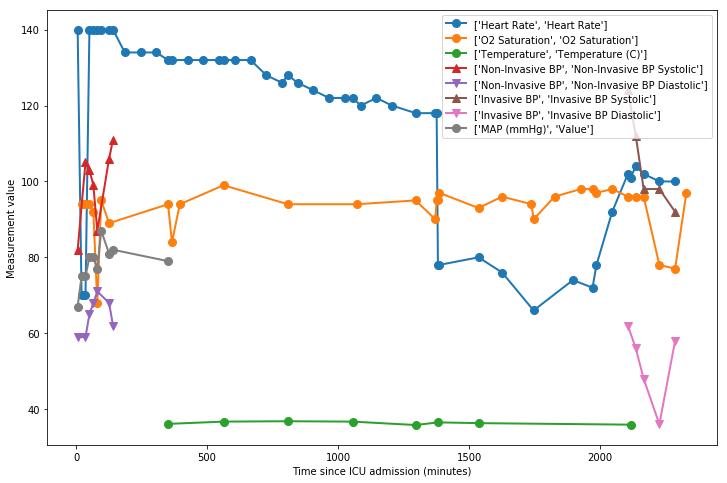

In [33]:
# list of lists
# for each element, the list is:
#   [nursingchartcelltypevallabel, nursingchartcelltypevalname]
vitals = [['Heart Rate','Heart Rate'],
          ['O2 Saturation','O2 Saturation'],
          ['Temperature','Temperature (C)'],
          ['Non-Invasive BP','Non-Invasive BP Systolic'],
          ['Non-Invasive BP','Non-Invasive BP Diastolic'],
          ['Invasive BP','Invasive BP Systolic'],
          ['Invasive BP','Invasive BP Diastolic'],
          ['MAP (mmHg)','Value']]

plt.figure(figsize=[12,8])
for v in vitals:
    idx = (df['nursingchartcelltypevallabel'] == v[0]) & (df['nursingchartcelltypevalname'] == v[1])
    df_plot = df.loc[idx, :]
    
    if 'Systolic' in v[1]:
        marker = '^-'
    elif 'Diastolic' in v[1]:
        marker = 'v-'
    else:
        marker = 'o-'
    plt.plot(df_plot['nursingchartoffset'],
             pd.to_numeric(df_plot['nursingchartvalue'], errors='coerce'),
            marker, markersize=8, lw=2, label=v)
    
plt.xlabel('Time since ICU admission (minutes)')
plt.ylabel('Measurement value')
plt.legend(loc='upper right')
plt.show()

## Hospitals with data available

In [35]:
query = query_schema + """
with t as
(
select distinct patientunitstayid
from nursecharting
)
select 
  pt.hospitalid
  , count(distinct pt.patientunitstayid) as number_of_patients
  , count(distinct t.patientunitstayid) as number_of_patients_with_tbl
from patient pt
left join t
  on pt.patientunitstayid = t.patientunitstayid
group by pt.hospitalid
""".format(patientunitstayid)

df = pd.read_sql_query(query, con)
df['data completion'] = df['number_of_patients_with_tbl'] / df['number_of_patients'] * 100.0
df.sort_values('number_of_patients_with_tbl', ascending=False, inplace=True)
df.head(n=10)

,hospitalid,number_of_patients,number_of_patients_with_tbl,data completion
11,73,7059,7004,99.220853
54,167,6092,5889,96.667761
106,264,5237,5206,99.408058
184,420,4679,4458,95.276769
134,338,4277,4246,99.275193
90,243,4243,4186,98.656611
71,199,4240,4185,98.702830
58,176,4328,4136,95.563771
206,458,3701,3659,98.865172
200,443,3656,3625,99.152079


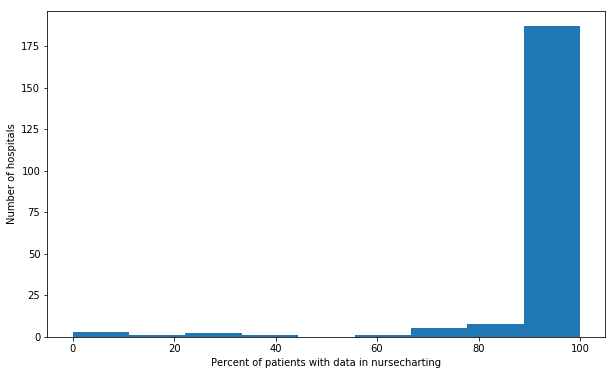

In [36]:
plt.figure(figsize=[10,6])
plt.hist(df['data completion'], bins=np.linspace(0, 100, 10))
plt.xlabel('Percent of patients with data in nursecharting')
plt.ylabel('Number of hospitals')
plt.show()

As is common in eICU-CRD, there are a subset of hospitals who routinely utilize this portion of the medical record (and thus have 90-100% data completion), while there are other hospitals who rarely use this interface and thus have poor data completion (0-10%).